In [1]:
sc


<SparkContext master=local[*] appName=PySparkShell>

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Cars24_Data_Analytics").getOrCreate()
sc = spark.sparkContext
cars_df = spark.read.csv("Cars24.csv", header=True, inferSchema=True)
cars_df.show(5)



+----+------------------+----------------+---------+---------+-----------------+---------+---------------+--------------------+
|Year|         Car Model|     Car Variant|KM Driven|Fuel Type|Transmission Type|Ownership|Price(in Lakhs)|            Location|
+----+------------------+----------------+---------+---------+-----------------+---------+---------------+--------------------+
|2015|      Maruti Swift|             ZDI|    60660|   Diesel|           Manual|1st owner|           2.79|Suryamani Nagar A...|
|2019|Maruti Swift Dzire|   TOUR S PETROL|   150000|   Petrol|           Manual|2nd owner|           3.57|Jogendra Nagar Ag...|
|2021|   Mahindra XUV500|             W11|    48700|   Diesel|           Manual|2nd owner|          11.63|Ram Nagar Agartal...|
|2015|     Maruti OMNI E|           8 STR|    55800|   Petrol|           Manual|3rd owner|           1.46|Dhaleswar Agartal...|
|2010|  Volkswagen Vento|HIGHLINE 1.6 MPI|    49320|   Petrol|           Manual|1st owner|           1.7

In [3]:
# Print schema of the dataset
cars_df.printSchema()


root
 |-- Year: integer (nullable = true)
 |-- Car Model: string (nullable = true)
 |-- Car Variant: string (nullable = true)
 |-- KM Driven: integer (nullable = true)
 |-- Fuel Type: string (nullable = true)
 |-- Transmission Type: string (nullable = true)
 |-- Ownership: string (nullable = true)
 |-- Price(in Lakhs): double (nullable = true)
 |-- Location: string (nullable = true)



In [4]:
# Print total number of cars in dataset
total_cars = cars_df.count()
print("Total number of cars in dataset:", total_cars)


Total number of cars in dataset: 9176


In [5]:
# Total number of distinct car models
total_models = cars_df.select("Car Model").distinct().count()
print("Total number of car models:", total_models)

# Print model names
cars_df.select("Car Model").distinct().show(truncate=False)


Total number of car models: 274
+----------------------+
|Car Model             |
+----------------------+
|Mahindra Xylo         |
|KIA CARENS            |
|Toyota RUMION         |
|Skoda Superb          |
|Hyundai GRAND I10 NIOS|
|Maruti Alto K10       |
|Skoda Yeti            |
|Honda ELEVATE         |
|Mahindra Quanto       |
|Maruti Alto           |
|Tata Nano             |
|Hyundai AURA          |
|Toyota Camry          |
|Mahindra TUV 300 PLUS |
|Mini Cooper           |
|Hyundai i20           |
|Renault Koleos        |
|Hyundai Verna         |
|Maruti Zen Estilo     |
|Maruti JIMNY          |
+----------------------+
only showing top 20 rows


+---------+----------+
|Fuel Type|Total Cars|
+---------+----------+
|   Diesel|      3768|
|   Hybrid|        18|
|      CNG|        96|
| Electric|        54|
|   Petrol|      5240|
+---------+----------+



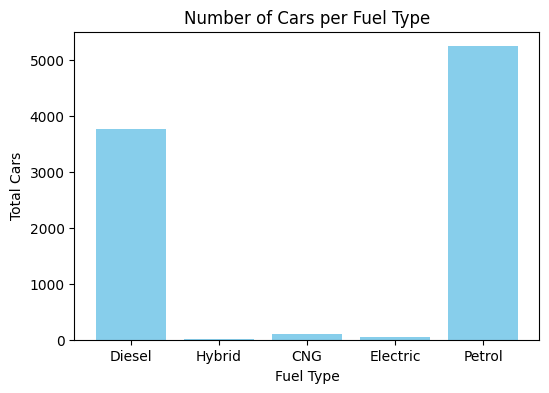

In [6]:

from pyspark.sql.functions import count

cars_by_fuel = cars_df.groupBy("Fuel Type").agg(count("*").alias("Total Cars"))
cars_by_fuel.show()

# Visualization
cars_by_fuel_pd = cars_by_fuel.toPandas()

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(cars_by_fuel_pd["Fuel Type"], cars_by_fuel_pd["Total Cars"], color="skyblue")
plt.title("Number of Cars per Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Total Cars")
plt.show()

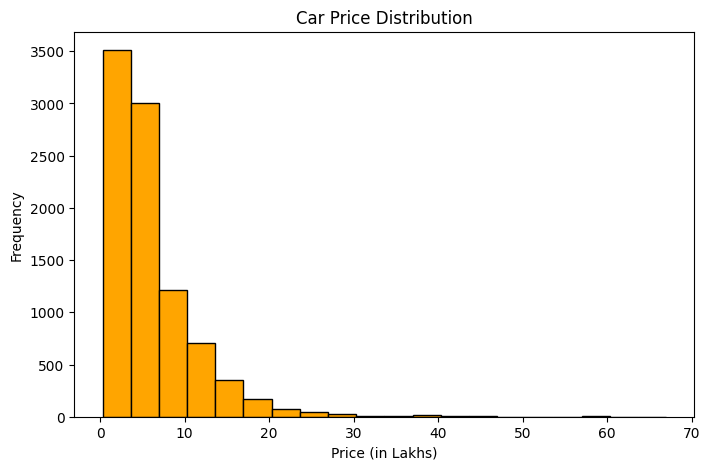

In [7]:
# Histogram of car prices
price_data = cars_df.select("Price(in Lakhs)").toPandas()

plt.figure(figsize=(8,5))
plt.hist(price_data["Price(in Lakhs)"], bins=20, color="orange", edgecolor="black")
plt.title("Car Price Distribution")
plt.xlabel("Price (in Lakhs)")
plt.ylabel("Frequency")
plt.show()


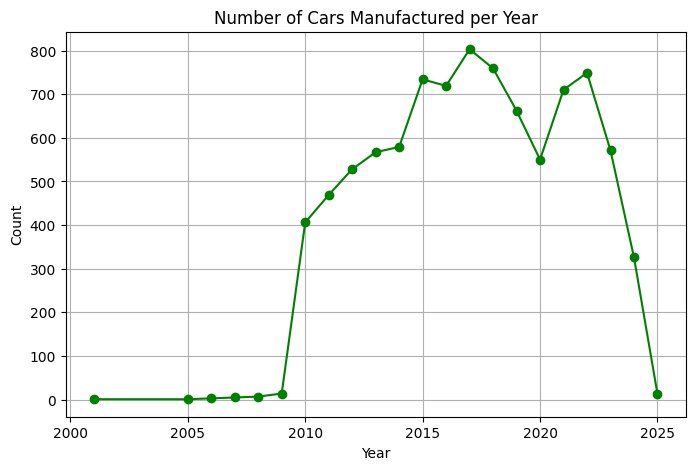

In [8]:
# Cars manufactured per year
year_counts = cars_df.groupBy("Year").count().orderBy("Year").toPandas()

plt.figure(figsize=(8,5))
plt.plot(year_counts["Year"], year_counts["count"], marker="o", color="green")
plt.title("Number of Cars Manufactured per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()


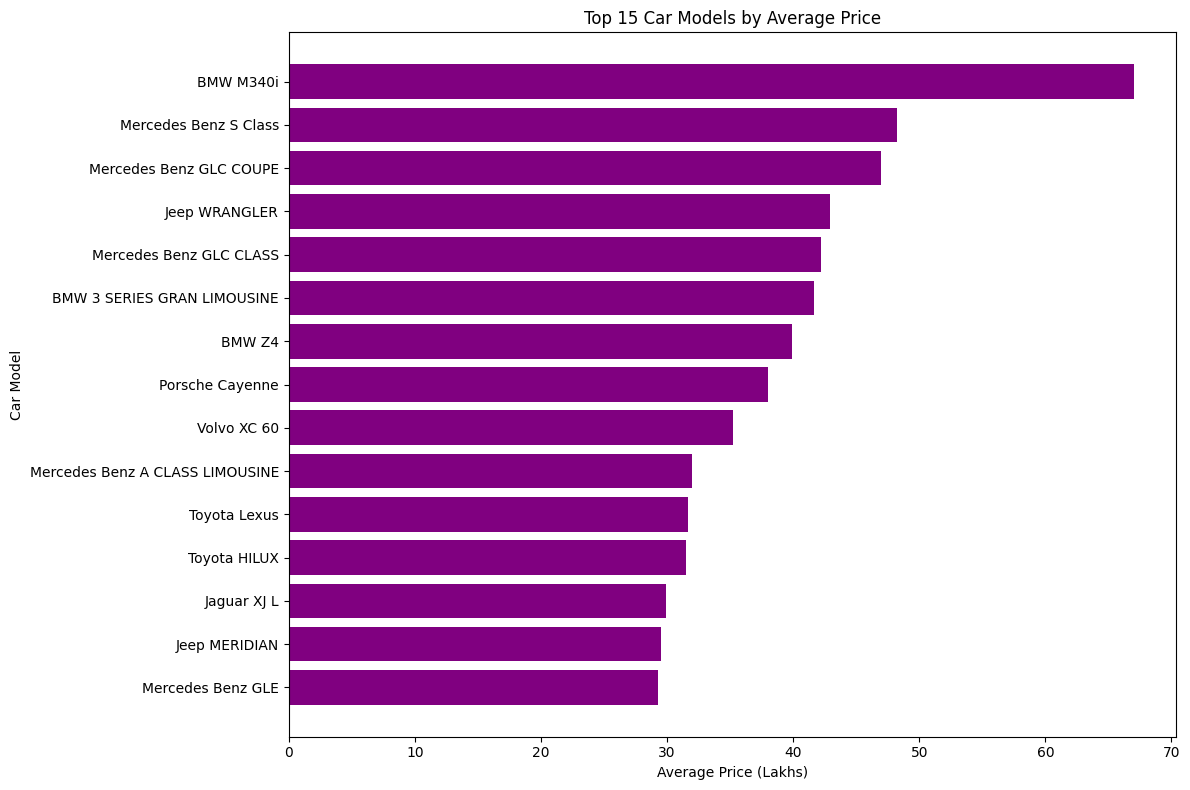

In [10]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

avg_price_model = cars_df.groupBy("Car Model") \
                         .avg("Price(in Lakhs)") \
                         .orderBy("avg(Price(in Lakhs))", ascending=False) \
                         .toPandas()  # convert to pandas for plotting

top_cars = avg_price_model.head(15)

plt.figure(figsize=(12,8))
plt.barh(top_cars["Car Model"][::-1], top_cars["avg(Price(in Lakhs))"][::-1], color="purple")  # reverse for top-down
plt.xlabel("Average Price (Lakhs)")
plt.ylabel("Car Model")
plt.title("Top 15 Car Models by Average Price")
plt.tight_layout()
plt.show()


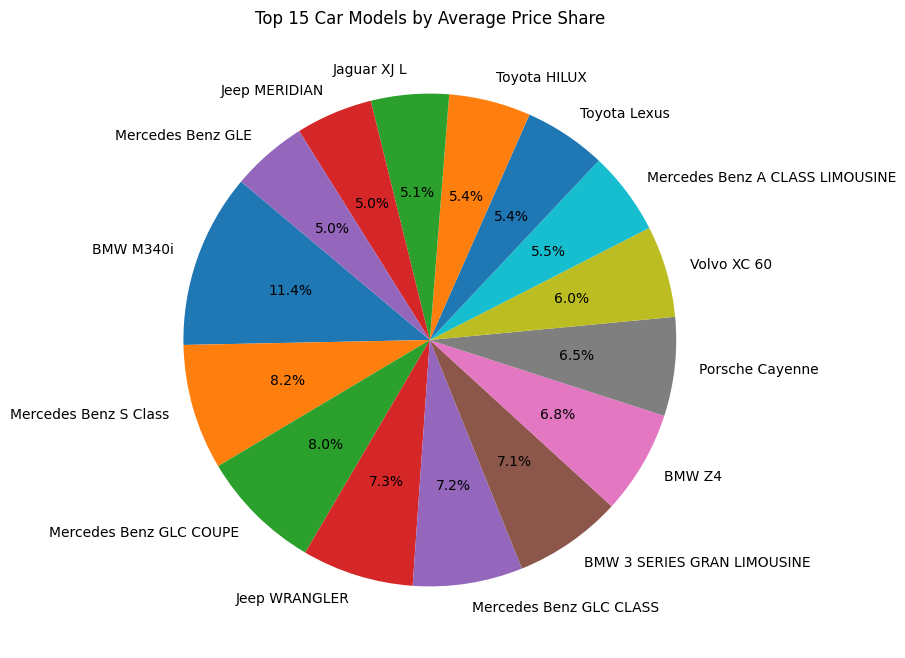

In [11]:
plt.figure(figsize=(8,8))
plt.pie(top_cars["avg(Price(in Lakhs))"], labels=top_cars["Car Model"], autopct='%1.1f%%', startangle=140)
plt.title("Top 15 Car Models by Average Price Share")
plt.show()


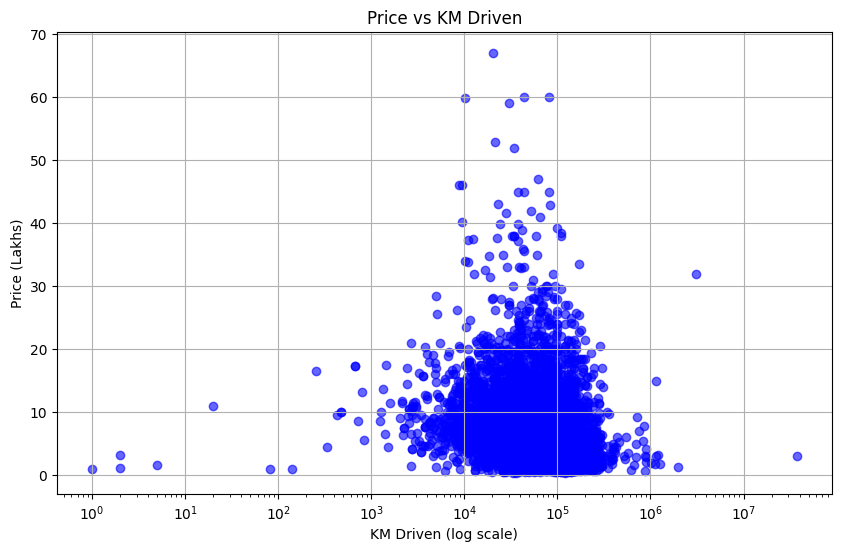

In [12]:
import matplotlib.pyplot as plt

df_pd = cars_df.select("Price(in Lakhs)", "KM Driven").where(
    cars_df["Price(in Lakhs)"].isNotNull() &
    cars_df["KM Driven"].isNotNull()
).toPandas()

plt.figure(figsize=(10,6))
plt.scatter(df_pd["KM Driven"], df_pd["Price(in Lakhs)"], color='blue', alpha=0.6)
plt.xscale('log')  # use log scale to spread km driven
plt.title("Price vs KM Driven")
plt.xlabel("KM Driven (log scale)")
plt.ylabel("Price (Lakhs)")
plt.grid(True)
plt.show()


+----------+---------+----------+
| Ownership|Fuel Type|Total Cars|
+----------+---------+----------+
| 2nd owner|   Hybrid|         3|
|10th owner|   Petrol|         1|
| 2nd owner|      CNG|        10|
| 2nd owner| Electric|         2|
| 5th owner|   Petrol|        41|
| 5th owner|   Diesel|        39|
| 1st owner|   Hybrid|        15|
| 6th owner|   Diesel|        13|
| 7th owner|   Diesel|         3|
| 1st owner| Electric|        51|
| 3rd owner|   Petrol|       418|
| 2nd owner|   Diesel|      1138|
| 7th owner|   Petrol|         2|
| 1st owner|   Petrol|      3304|
| 4th owner|   Diesel|       150|
| 3rd owner| Electric|         1|
| 3rd owner|   Diesel|       500|
| 4th owner|   Petrol|       142|
| 8th owner|   Petrol|         1|
| 6th owner|   Petrol|        10|
+----------+---------+----------+
only showing top 20 rows


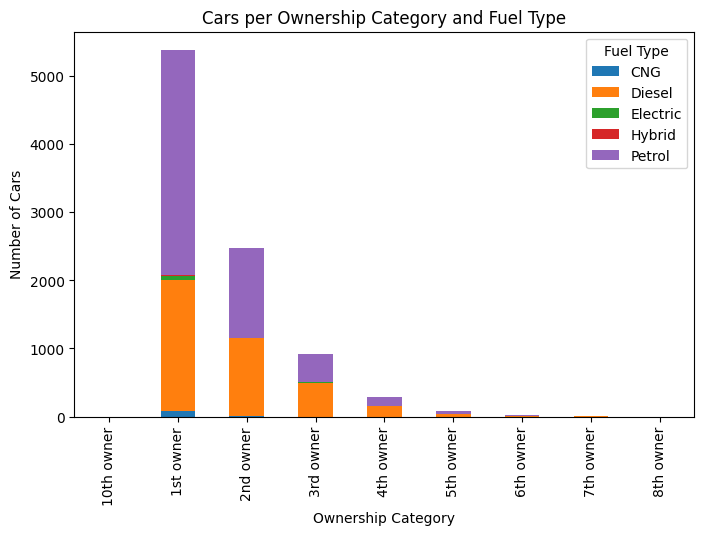

In [18]:
from pyspark.sql.functions import count
import matplotlib.pyplot as plt

# Group by Ownership and Fuel Type
cars_by_owner_fuel = cars_df.groupBy("Ownership", "Fuel Type").agg(count("*").alias("Total Cars"))
cars_by_owner_fuel.show()

# Visualization (stacked bar chart)
cars_by_owner_fuel_pd = cars_by_owner_fuel.toPandas().pivot(
    index="Ownership", columns="Fuel Type", values="Total Cars"
).fillna(0)

cars_by_owner_fuel_pd.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Cars per Ownership Category and Fuel Type")
plt.xlabel("Ownership Category")
plt.ylabel("Number of Cars")
plt.legend(title="Fuel Type")
plt.show()


In [13]:
fuel_count_df = cars_df.groupBy("Fuel Type") \
                       .count() \
                       .orderBy("count", ascending=False)

fuel_count_df.show(truncate=False)


+---------+-----+
|Fuel Type|count|
+---------+-----+
|Petrol   |5240 |
|Diesel   |3768 |
|CNG      |96   |
|Electric |54   |
|Hybrid   |18   |
+---------+-----+



In [14]:
avg_price_trans_df = cars_df.groupBy("Transmission Type") \
                            .avg("Price(in Lakhs)") \
                            .orderBy("avg(Price(in Lakhs))", ascending=False)

avg_price_trans_df.show(truncate=False)


+-----------------+--------------------+
|Transmission Type|avg(Price(in Lakhs))|
+-----------------+--------------------+
|Auto             |11.426305852737563  |
|Manual           |4.990380964935406   |
+-----------------+--------------------+



In [15]:
top_km_df = cars_df.select("Car Model", "Car Variant", "KM Driven") \
                   .where(cars_df["KM Driven"].isNotNull()) \
                   .orderBy("KM Driven", ascending=False) \
                   .limit(10)

top_km_df.show(truncate=False)


+-------------------+------------------------------+---------+
|Car Model          |Car Variant                   |KM Driven|
+-------------------+------------------------------+---------+
|Skoda Rapid        |AMBITION 1.5 TDI AT           |37270000 |
|MG GLOSTER         |SAVVY 6 STR 2.0 TWIN TURBO 4WD|3100000  |
|Maruti Eeco        |5 STR CNG WITH HTR            |2000000  |
|Maruti Swift Dzire |LDI                           |1260000  |
|Maruti Swift       |VDI                           |1220000  |
|Mahindra XUV700    |AX 5 D MT 7 STR               |1160000  |
|Mahindra XUV500    |W8                            |1140000  |
|Tata Zest          |XT 90PS DIESEL                |1130000  |
|Hyundai Grand i10  |MAGNA 1.1 CRDI                |1019999  |
|Hyundai New Elantra|1.6 SX (O) AT CRDI            |890000   |
+-------------------+------------------------------+---------+



In [16]:
from pyspark.sql.functions import col

# Create a new DataFrame with updated prices
cars_df_updated = cars_df.withColumn(
    "Price(in Lakhs)",
    col("Price(in Lakhs)") * 1.10  # increase by 10%
)

cars_df_updated.show()


+----+------------------+--------------------+---------+---------+-----------------+---------+------------------+--------------------+
|Year|         Car Model|         Car Variant|KM Driven|Fuel Type|Transmission Type|Ownership|   Price(in Lakhs)|            Location|
+----+------------------+--------------------+---------+---------+-----------------+---------+------------------+--------------------+
|2015|      Maruti Swift|                 ZDI|    60660|   Diesel|           Manual|1st owner|3.0690000000000004|Suryamani Nagar A...|
|2019|Maruti Swift Dzire|       TOUR S PETROL|   150000|   Petrol|           Manual|2nd owner|             3.927|Jogendra Nagar Ag...|
|2021|   Mahindra XUV500|                 W11|    48700|   Diesel|           Manual|2nd owner|12.793000000000001|Ram Nagar Agartal...|
|2015|     Maruti OMNI E|               8 STR|    55800|   Petrol|           Manual|3rd owner|             1.606|Dhaleswar Agartal...|
|2010|  Volkswagen Vento|    HIGHLINE 1.6 MPI|    49320

In [17]:
import os
import shutil
from pyspark.sql.functions import col, when

condition = col("Price(in Lakhs)") > 20 


cars_df_updated = cars_df.withColumn(
    "Price_Category",
    when(col("Price(in Lakhs)") > 20, "Luxury")
    .when(col("Price(in Lakhs)") > 10, "Mid-range")
    .otherwise("Budget")
)

filtered_df = cars_df_updated.filter(condition)

output_dir = r"C:\Users\SanyuPaul\Desktop\BDA_Project\ExpensiveCars_temp"
final_file = r"C:\Users\SanyuPaul\Desktop\BDA_Project\ExpensiveCars.csv"

try:
    filtered_df.coalesce(1) \
        .write.option("header", True) \
        .mode("overwrite") \
        .csv(output_dir)
    for file in os.listdir(output_dir):
        if file.startswith("part-") and file.endswith(".csv"):
            shutil.move(os.path.join(output_dir, file), final_file)
            break

    shutil.rmtree(output_dir)
    print(f"✅ Saved expensive cars into: {final_file}")

except Exception as e:
    print("⚠️ Spark CSV write failed, using Pandas fallback...", e)
    filtered_df.toPandas().to_csv(final_file, index=False)
    print("✅ Saved expensive cars using Pandas fallback.")  # fixed


✅ Saved expensive cars into: C:\Users\SanyuPaul\Desktop\BDA_Project\ExpensiveCars.csv
